<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS 1 - Erick Watt-Udogu

# Setup Code

In [36]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

%matplotlib inline

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()


# Importing Files

## List of U.S. states and territories by African-American population (HTML)

Source: Wikipedia https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population

In [33]:
aapop = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_African-American_population',match="State/Territory")[0].head(65)
aapop.head(5)

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
0,United States of America,19.3%,18.9%,19.0%,18.4%,18.1%,16.8%,15.7%,14.1%,12.7%,...,9.7%,9.8%,10.0%,10.5%,11.1%,11.7%,12.1%,12.9%,13.6%,14.2%
1,Alabama,NaN,41.4%,29.0%,33.2%,38.5%,43.3%,44.7%,45.4%,47.7%,...,35.7%,34.7%,32.0%,30.0%,26.2%,25.6%,25.3%,26.0%,26.3%,26.8%
2,Alaska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2%,0.2%,NaN,3.0%,3.0%,3.4%,4.1%,4.3%,4.7%,4.8%
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.02%,0.04%,0.02%,NaN
4,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.3%,0.3%,...,2.5%,3.0%,3.5%,3.3%,3.0%,2.8%,3.0%,3.6%,5.0%,6.2%


## Graduate School Geofence Campaign Data (CSV)

Source: Provided by LocalIQ the Geofence Vendor

In [34]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ewattudo/datamanagement/refs/heads/main/Geofence%20Report%20With%20Creatives.csv", "Geofence.csv")
Geofence = pd.read_csv('Geofence.csv')
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


## World Countries (SHP)

Source: World Bank https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip

In [35]:
! wget -q -O Countries.zip https://datacatalogfiles.worldbank.org/ddh-published/0038272/DR0046659/wb_countries_admin0_10m.zip
zip_ref = zipfile.ZipFile('Countries.zip', 'r'); zip_ref.extractall(); zip_ref.close()
Countries=gpd.read_file('/content/WB_countries_Admin0_10m/WB_countries_Admin0_10m.shp')
Countries.head(5)

,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,...,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,None,260580739,17,3028000.0,2017,...,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,2,Admin-0 country,2,Sovereign country,Malaysia,None,31381992,15,863000.0,2017,...,Malaysia,Malezya,Malaysia,马来西亚,Malaysia,None,EAP,68.456913,26.703172,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,3,Admin-0 country,2,Sovereign country,Republic of Chile,None,17789267,14,436100.0,2017,...,Chile,Şili,Chile,智利,Chile,None,LCR,416.997272,76.761813,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,4,Admin-0 country,2,Sovereign country,Plurinational State of Bolivia,None,11138234,14,78350.0,2017,...,Bolivia,Bolivya,Bolivia,玻利維亞,Bolivia,None,LCR,54.345991,92.203587,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,5,Admin-0 country,2,Sovereign country,Republic of Peru,None,31036656,15,410400.0,2017,...,Peru,Peru,Peru,秘鲁,Peru,None,LCR,73.262192,106.417089,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


# Reviewing Data

Here I am just taking a look at the files. This will provide me with a plan for manipulating the data inorder to make it useful.

## African American Population

In [24]:
#All objects. I am going to have to turn all these into numbers.
aapop.dtypes

,0
State/Territory,object
1790,object
1800,object
1810,object
1820,object
1830,object
1840,object
1850,object
1860,object
1870,object


In [23]:
#I need to take the US out, it's going to skew the data once I change all the fields from object.
aapop.describe()

,State/Territory,1790,1800,1810,1820,1830,1840,1850,1860,1870,...,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
count,57,19,26,29,30,31,32,38,45,49,...,52,52,51,52,52,52,56,57,57,53
unique,57,18,23,28,27,30,30,32,34,37,...,36,37,39,45,45,45,49,52,51,47
top,United States of America,0.6%,0.5%,2.6%,2.9%,0.3%,0.3%,0.2%,0.2%,0.2%,...,0.2%,0.1%,0.1%,0.2%,0.3%,0.3%,0.3%,4.4%,1.6%,3.2%
freq,1,2,3,2,3,2,3,5,7,4,...,8,5,4,3,4,3,3,3,3,3


<Axes: >

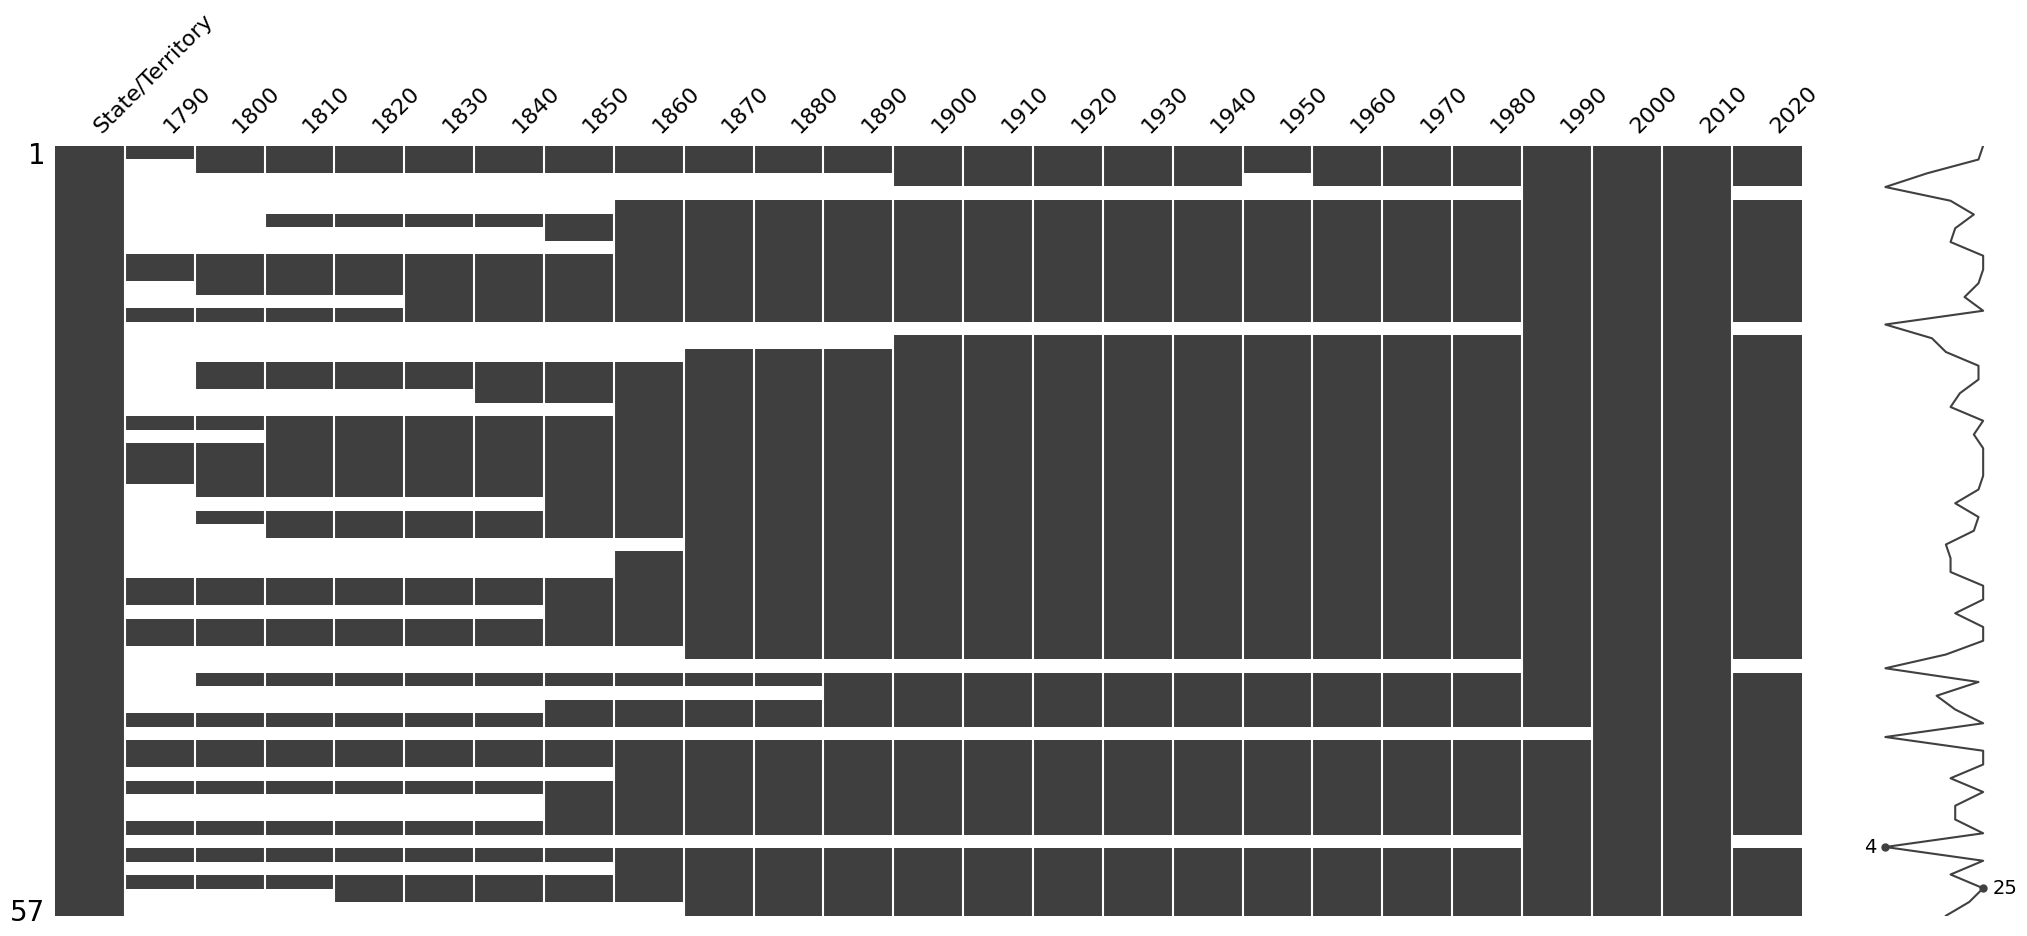

In [30]:
#This all makes sense. I hypothesize that the missing data is related to when statehood was granted. I think I might just pull 2010 and 2020
msno.matrix(aapop)

## Geofence

In [37]:
Geofence.head(5)

,Date,Campaign Name,Geofences,Impressions,Clicks,CTR,Walk-ins,CPC,CPW,CPM,Spend
0,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Camden Waterfront District\t1 Riverside Drive\...,179,0,0.00%,0,0%,$0.00,$7.05,$1.26
1,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,Rowan University\t201 Mullica Hill Road\tGlass...,28356,49,0.17%,0,4.04%,$0.00,$6.98,$197.96
2,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Environmental Protect...,37,0,0.00%,0,0%,$0.00,$6.99,$0.26
3,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Human Services\t222 S...,28,0,0.00%,0,0%,$0.00,$7.01,$0.20
4,1-Feb-25,Targeted Display | Rutgers Camden - Graduate S...,New Jersey Department of Labor & Workforce Dev...,61,0,0.00%,0,0%,$0.00,$7.22,$0.44


In [27]:
#All the percentage data needs to be converted from object, but under the "work smarer not harder" maxim, I am going to choose some of the variables to convert.
Geofence.dtypes

,0
Date,object
Campaign Name,object
Geofences,object
Impressions,int64
Clicks,int64
CTR,object
Walk-ins,int64
CPC,object
CPW,object
CPM,object


In [40]:
#I had to use Gemini to help me get rid of the "$"
Geofence['Spend'] = Geofence['Spend'].str.replace('[\$,]', '', regex=True).astype(float)

In [41]:
Geofence.describe()

,Impressions,Clicks,Walk-ins,Spend
count,26.000000,26.000000,26.0,26.000000
mean,5807.038462,9.538462,0.0,40.782308
std,17729.734650,27.963163,0.0,124.351966
min,28.000000,0.000000,0.0,0.200000
25%,187.500000,0.000000,0.0,1.302500
50%,873.500000,1.000000,0.0,6.130000
75%,2751.000000,5.000000,0.0,19.312500
max,88372.000000,138.000000,0.0,620.090000


<Axes: >

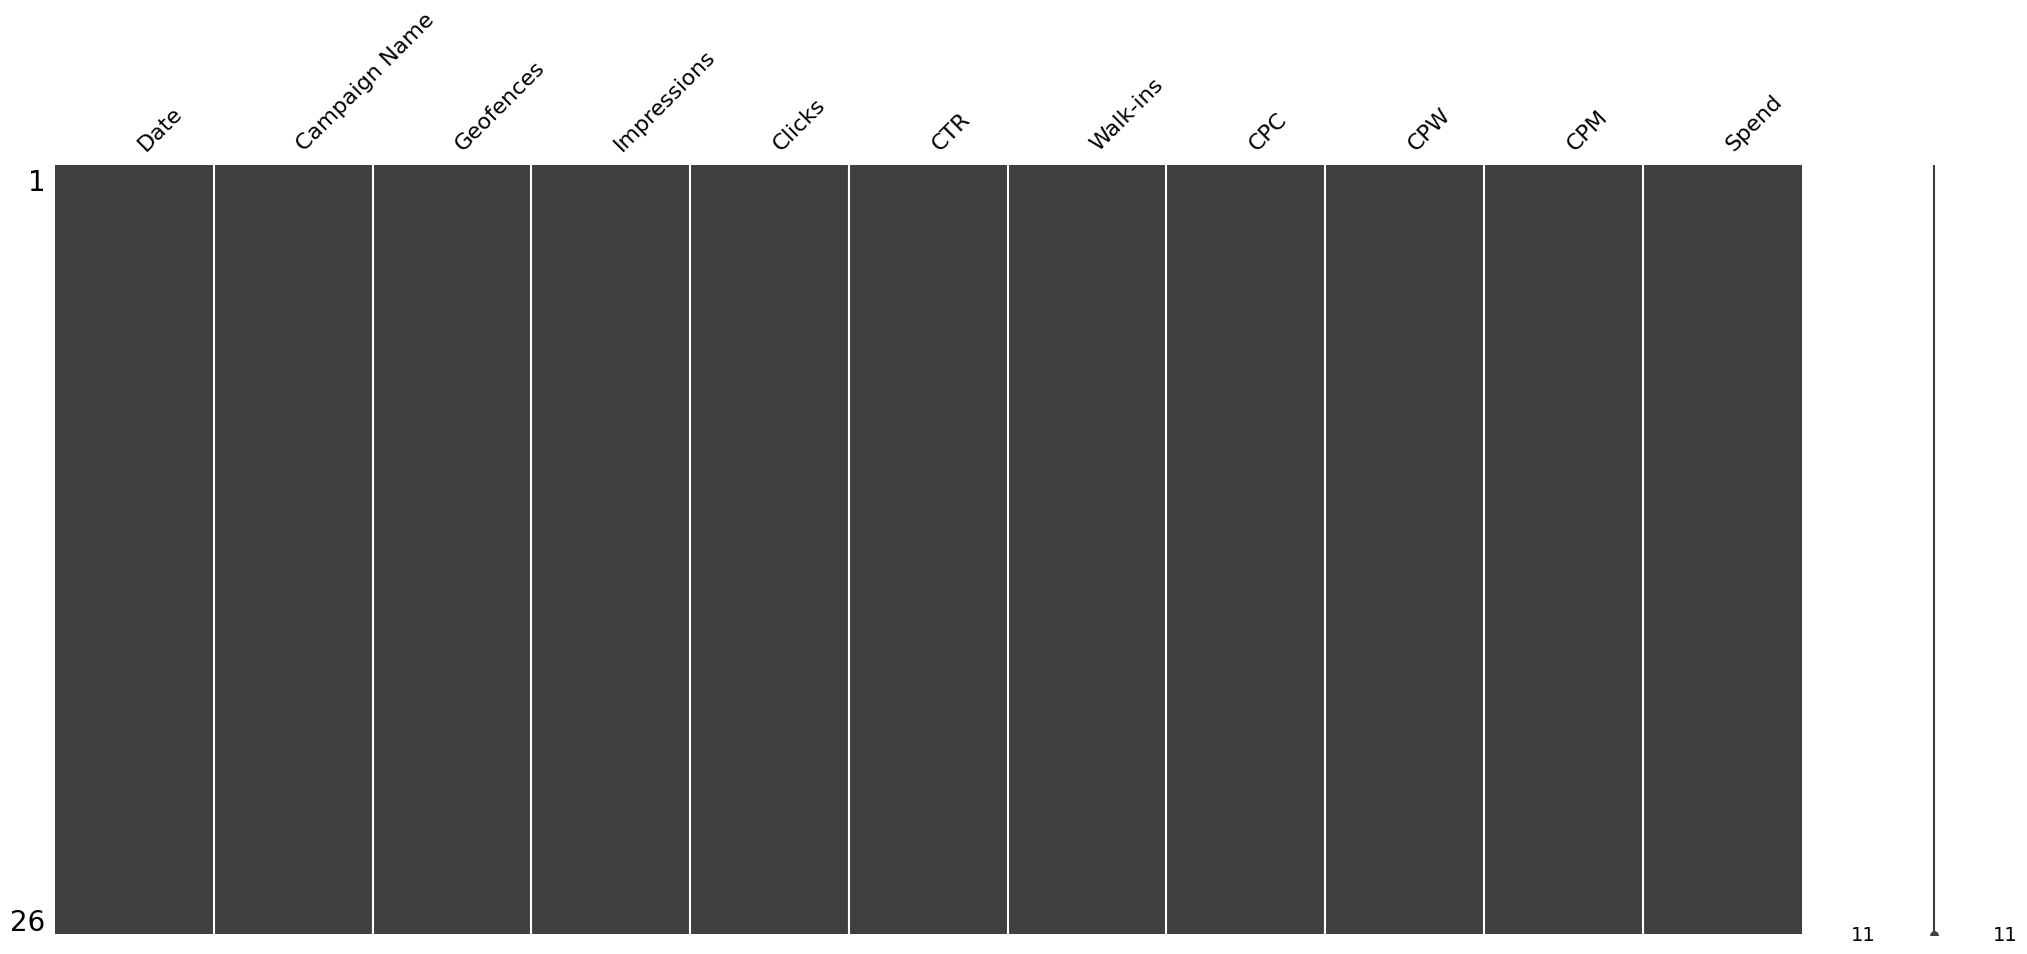

In [28]:
msno.matrix(Geofence)

## World Data

In [29]:
Countries.dtypes

,0
OBJECTID,int64
featurecla,object
LEVEL,int32
TYPE,object
FORMAL_EN,object
FORMAL_FR,object
POP_EST,int64
POP_RANK,int32
GDP_MD_EST,float64
POP_YEAR,int32


In [31]:
Countries.describe()

,OBJECTID,LEVEL,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,Shape_Leng,Shape_Area
count,251.000000,251.0,2.510000e+02,251.000000,2.510000e+02,251.00000,251.000000,251.000000,251.000000,251.000000
mean,126.000000,2.0,2.961458e+07,11.494024,4.815592e+05,1944.52988,1687.051793,1935.179283,63.152872,61.128765
std,72.601653,0.0,1.239078e+08,3.995368,1.943698e+06,375.74860,755.924468,394.988572,217.498918,243.601360
min,1.000000,2.0,0.000000e+00,1.000000,0.000000e+00,0.00000,-99.000000,0.000000,0.004431,0.000001
25%,63.500000,2.0,1.573210e+05,9.000000,3.167000e+03,2017.00000,2001.000000,2016.000000,2.400842,0.051244
50%,126.000000,2.0,4.926330e+06,12.000000,3.501000e+04,2017.00000,2006.000000,2016.000000,18.826169,5.882082
75%,188.500000,2.0,1.783726e+07,14.000000,2.304185e+05,2017.00000,2010.000000,2016.000000,50.510444,37.990619
max,251.000000,2.0,1.379303e+09,18.000000,2.114000e+07,2017.00000,2012.000000,2016.000000,2573.712484,2925.332609


<Axes: >

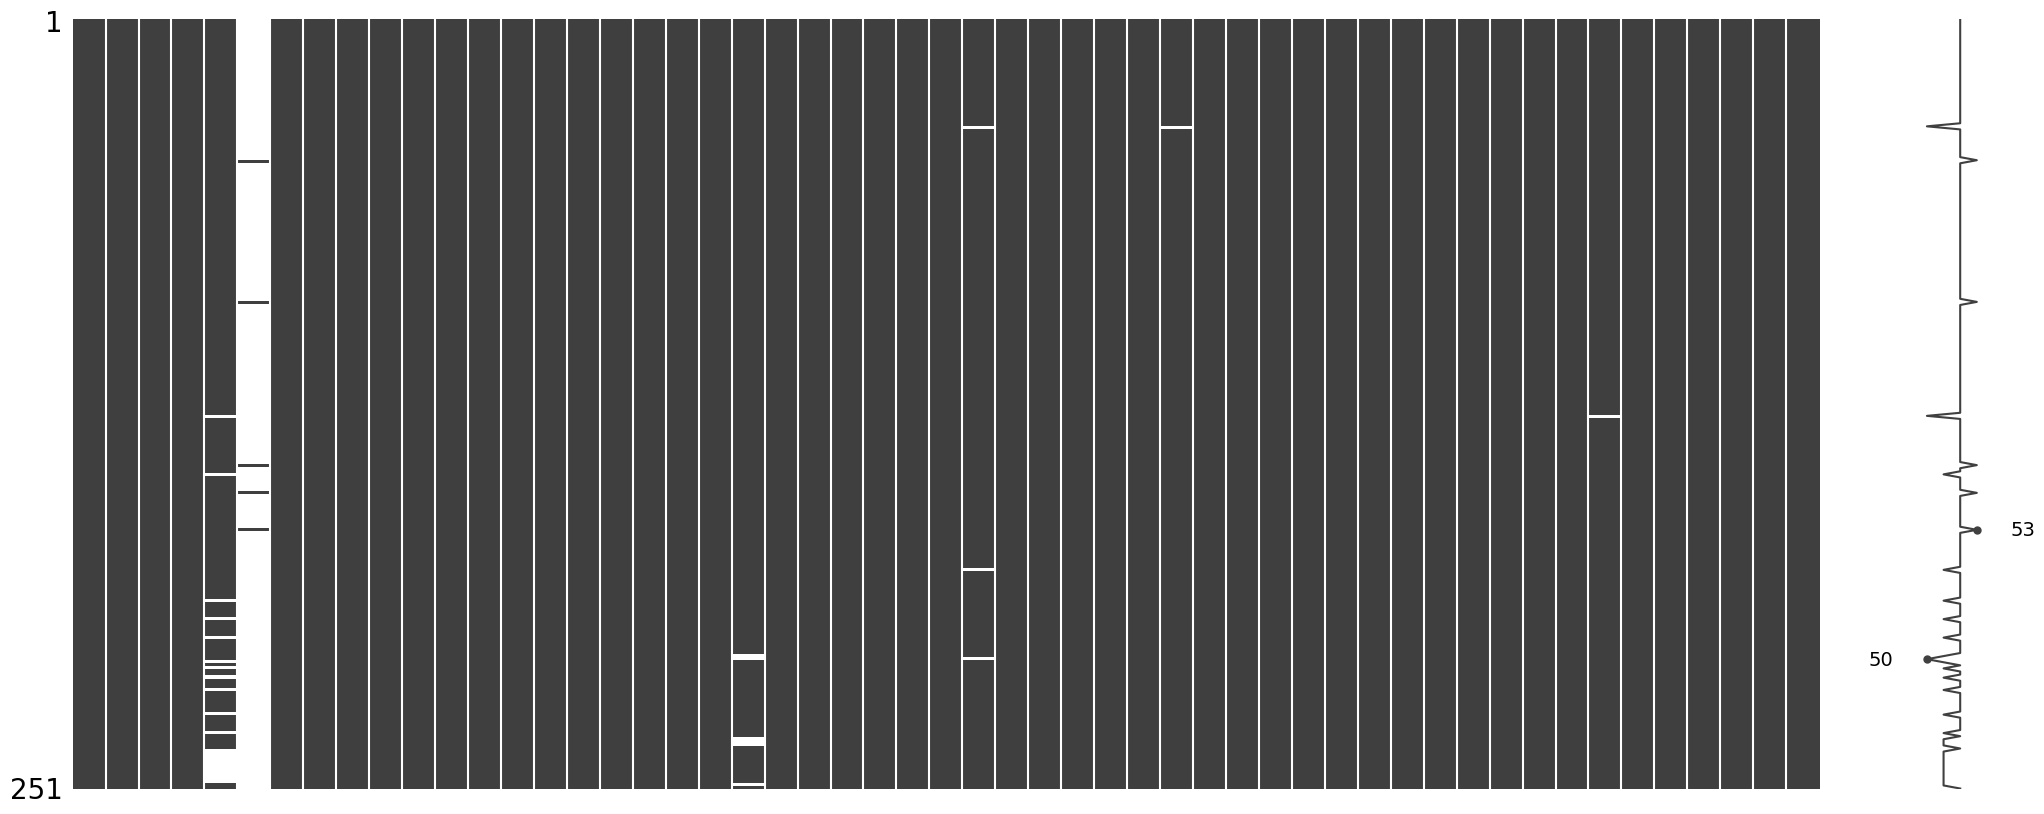

In [32]:
msno.matrix(Countries)